In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('1553768847-housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Univariate Analysis

In [7]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [9]:
df1 = data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]

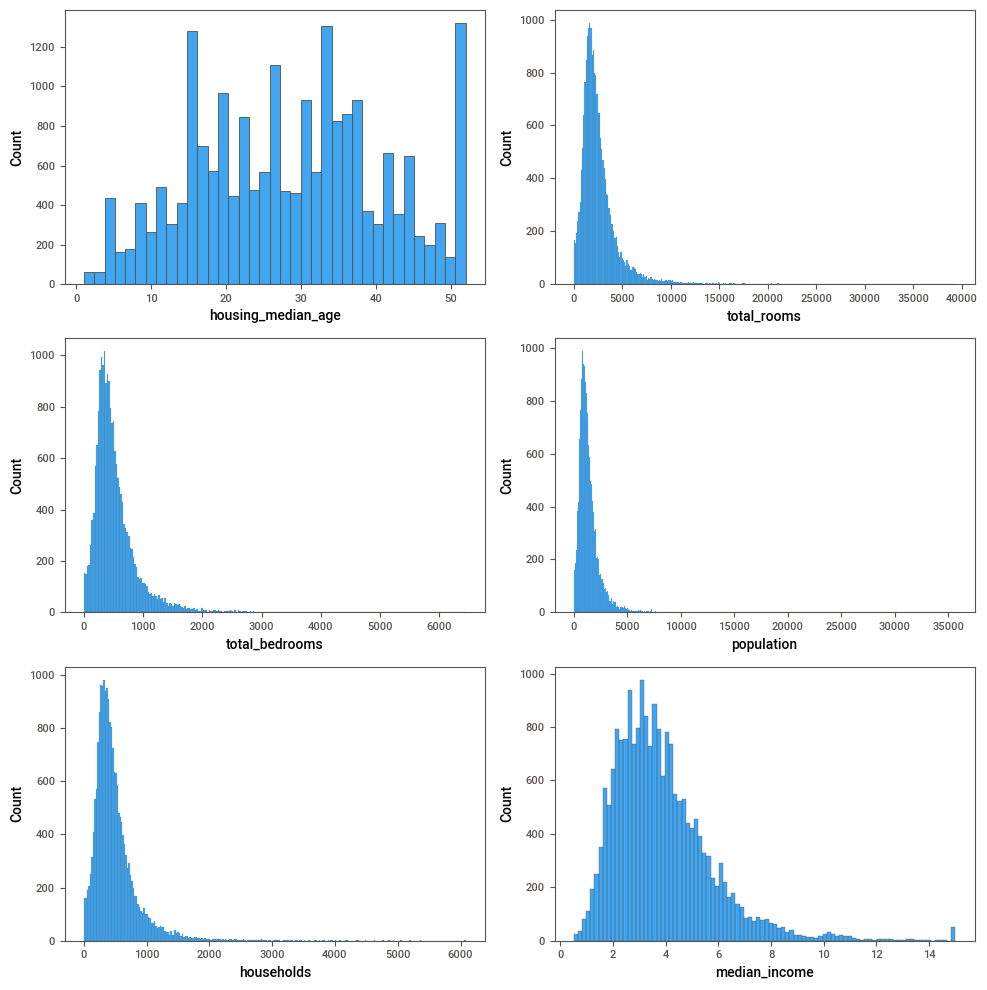

In [10]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in df1:
    plt.subplot(3,2, plotnumber)
    sns.histplot(x= df1[i])
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

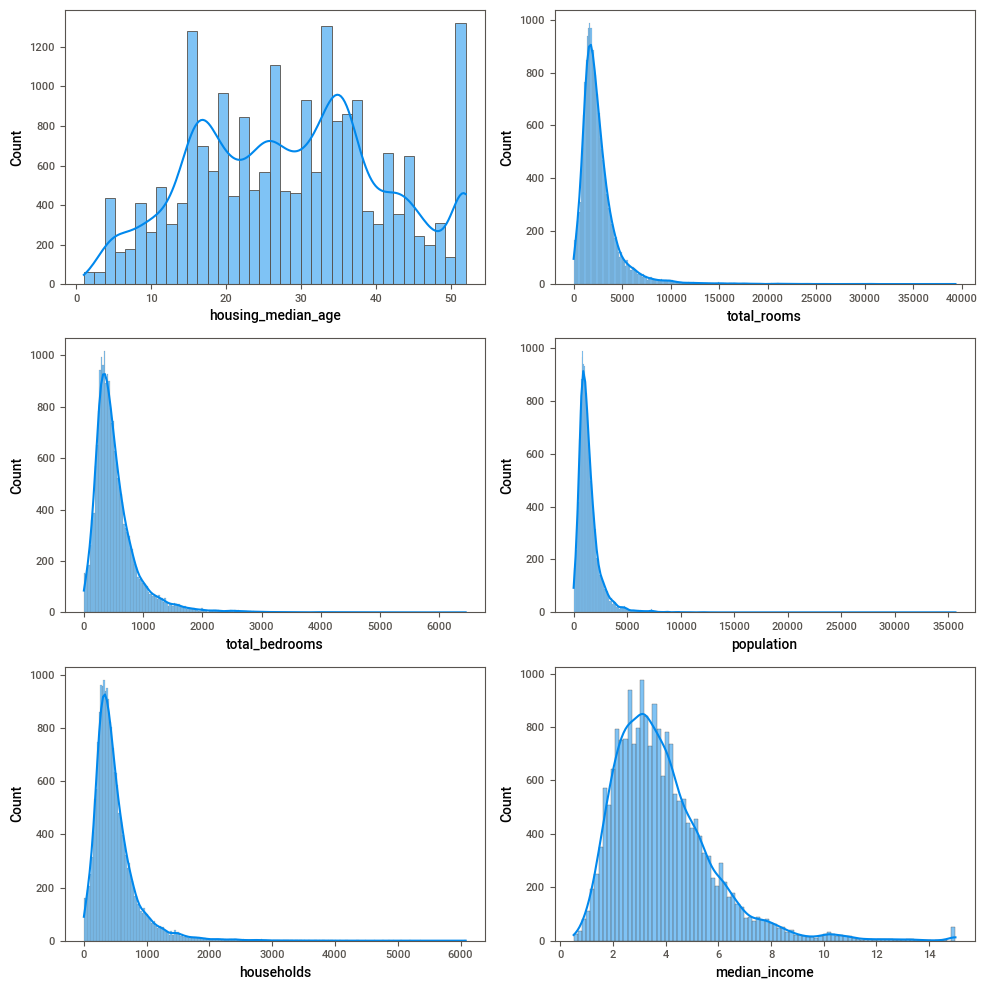

In [11]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in df1:
    plt.subplot(3,2, plotnumber)
    sns.histplot(x= df1[i],kde=True)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='housing_median_age', ylabel='count'>

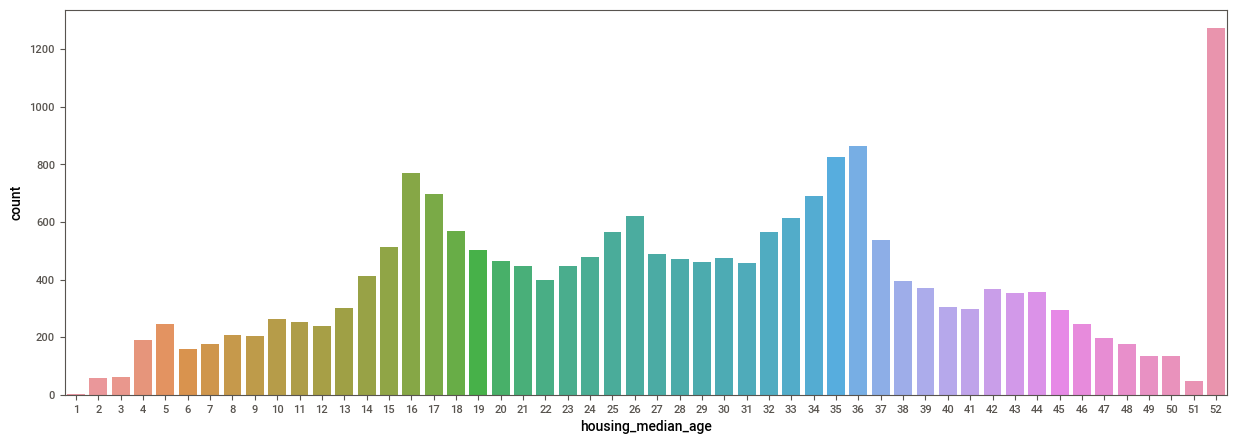

In [12]:
plt.figure(figsize=(15,5))
sns.countplot( x = df1.housing_median_age)

## Data Perprocessing

### Handling with null values

In [13]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [14]:
data.loc[data.total_bedrooms.isnull(),'total_bedrooms'] = np.median(data.total_bedrooms.dropna())

In [15]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Handling with outlayers

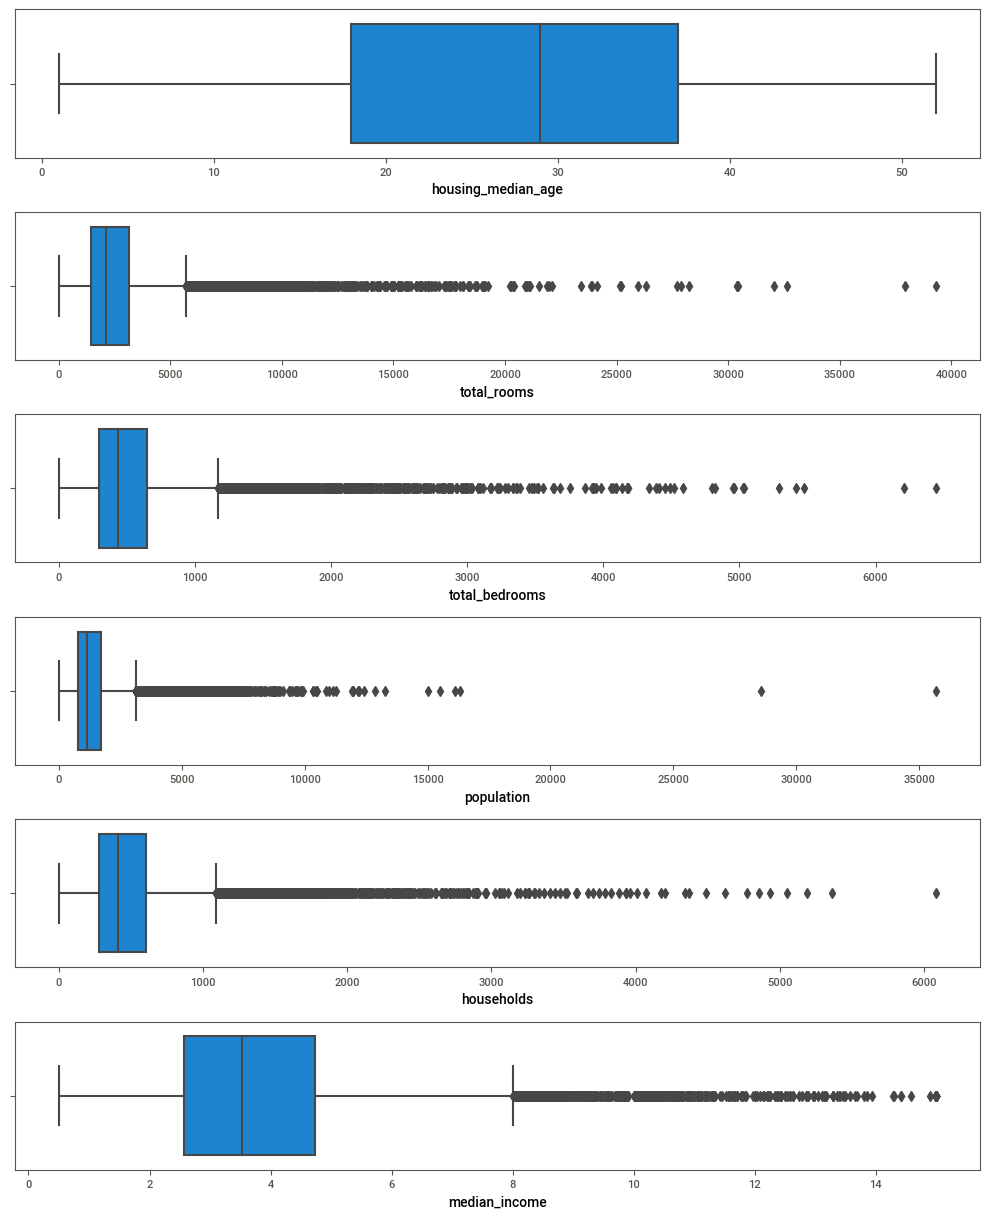

In [16]:
plt.figure(figsize=(10,20))
plotnumber = 1
for i in df1:
    plt.subplot(10,1, plotnumber)
    sns.boxplot(x= df1[i])
    plotnumber+=1
plt.tight_layout()

In [17]:
data.loc[data.total_rooms>25000,'total_rooms'] = np.median(data.total_rooms)

In [18]:
data.loc[data.total_bedrooms>4800, 'total_bedrooms'] = np.median(data.total_bedrooms)

In [19]:
data.loc[data.population>20000, 'population'] = np.median(data.population)

In [20]:
data.loc[data.households>4500, 'households'] = np.median(data.households)

In [21]:
data.loc[data.median_income>14, 'median_income'] = np.median(data.median_income)

### Conversion Categorical data into numerical data

In [22]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
data.loc[data.ocean_proximity=='<1H OCEAN','ocean_proximity'] = 4

In [24]:
data.loc[data.ocean_proximity=='INLAND','ocean_proximity'] = 3
data.loc[data.ocean_proximity=='NEAR OCEAN','ocean_proximity'] = 2
data.loc[data.ocean_proximity=='NEAR BAY','ocean_proximity'] = 1
data.loc[data.ocean_proximity=='ISLAND','ocean_proximity'] = 0

In [25]:
data.ocean_proximity.value_counts()

4    9136
3    6551
2    2658
1    2290
0       5
Name: ocean_proximity, dtype: int64

## Feature Selcetion

In [26]:
 data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
housing_median_age,1.000000,-0.366847,-0.320351,-0.304060,-0.304407,-0.138878
total_rooms,-0.366847,1.000000,0.909108,0.823638,0.895928,0.215511
total_bedrooms,-0.320351,0.909108,1.000000,0.856559,0.969042,0.001225
population,-0.304060,0.823638,0.856559,1.000000,0.896034,0.018419
households,-0.304407,0.895928,0.969042,0.896034,1.000000,0.024175
median_income,-0.138878,0.215511,0.001225,0.018419,0.024175,1.000000


<Axes: >

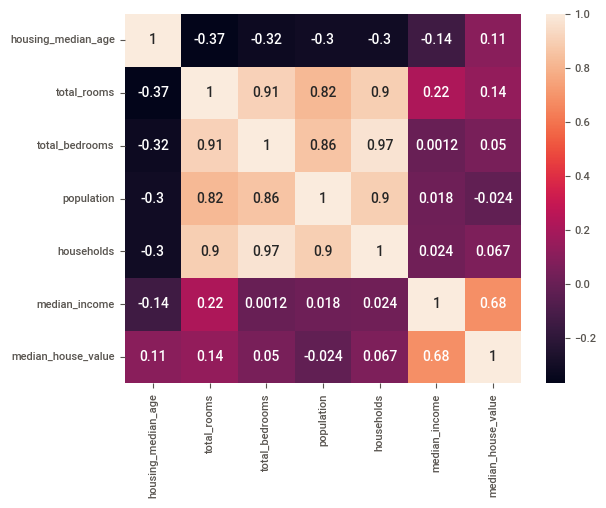

In [27]:
sns.heatmap( data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity','median_house_value']].corr(),annot=True)

<Axes: >

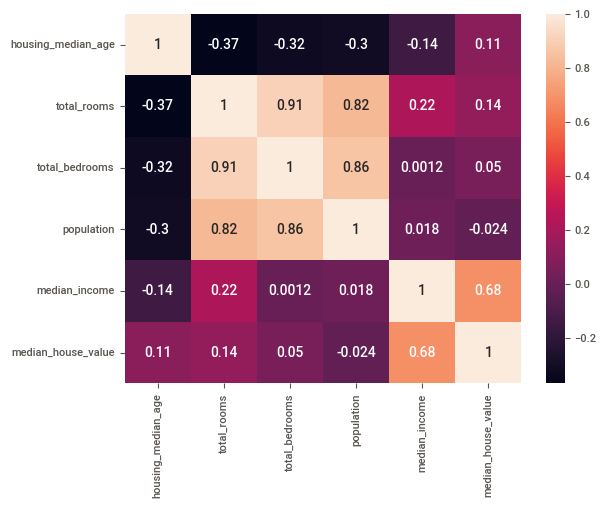

In [43]:
sns.heatmap( data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income','ocean_proximity','median_house_value']].corr(),annot=True)

<Axes: >

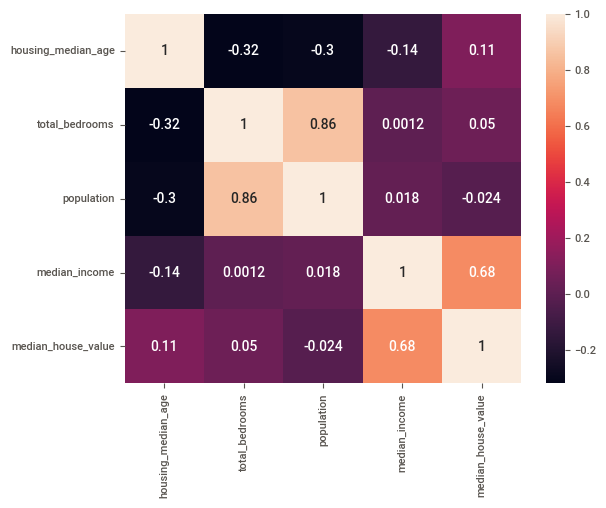

In [28]:
sns.heatmap( data[['housing_median_age', 
       'total_bedrooms', 'population', 'median_income','ocean_proximity','median_house_value']].corr(),annot=True)

## Model Creation

In [29]:
x = data[['housing_median_age',
       'total_bedrooms', 'population', 'median_income','ocean_proximity']]
y = data.median_house_value
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [30]:
x_test.shape

(5160, 5)

In [31]:
from sklearn.linear_model import LinearRegression
Li = LinearRegression()

In [32]:
Li.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = Li.predict(x_test)
y_pred

array([ 89364.83036535, 133791.42021042, 231745.80248259, ...,
       121079.39444232, 314187.72960739, 352932.1317598 ])

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
knn = KNeighborsRegressor()
svm = SVR()

In [35]:
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([204260., 125440., 204980., ..., 154640., 126760., 196320.])

In [36]:
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([179594.06384159, 179580.51582314, 179600.3274894 , ...,
       179544.82058917, 179613.16563148, 179616.65075225])

## Model Evluation 

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
mean_absolute_error(y_test,y_pred)

58526.1744437196

In [39]:
mean_absolute_error(y_test,y_pred_knn)

90733.9573255814

In [40]:
r2 = r2_score(y_test,y_pred)

In [41]:
r2

0.5236617853055825

In [59]:
adj_r2 = 1 - ((1-r2)*(5160-1))/(5160-5-1)
adj_r2

0.523199679936263

In [60]:
mean_absolute_error(y_test,y_pred_knn)

90733.9573255814

In [61]:
r2_knn = r2_score(y_test,y_pred_knn)
r2_knn

-0.042308777026230704

In [62]:
r2_svm = r2_score(y_test,y_pred_svm)
r2_svm

-0.0538517445763651

In [63]:
adj_r2_knn = 1 - ((1-r2_knn)*(5160-1))/(5160-7-1)
adj_r2_knn

-0.04372495742979887

In [51]:
adj_r2_svm = 1 - ((1-r2_svm)*(5160-1))/(5160-7-1)
adj_r2_svm

-0.055283608359756986

## Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
li = cross_val_score(Li,x,y,cv = 5)
li

array([0.45265153, 0.41048299, 0.49521378, 0.41303052, 0.56123026])

In [55]:
li.mean()

0.4665218153681878

In [56]:
Knn = cross_val_score(knn,x,y, cv=5)
Knn

array([-0.36454466,  0.01298407, -0.1188288 , -0.17107571, -0.12995395])

In [57]:
Svm = cross_val_score(svm,x,y,cv = 5)
Svm

array([-0.03223751, -0.15674577, -0.28563391, -0.00131148, -0.18648733])

## Hyperparmeter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [49]:
distributions = dict(C=uniform(loc=0, scale=4),
...                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(Li,distributions,random_state=42)

In [50]:
clf.fit(x,y)

ValueError: Invalid parameter 'C' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].